In [1]:
from util import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [26]:
spatial_step=3
monkey='N'
all_feat, labels = get_all_feat_and_labels(monkey, 'GO-ON', 0.2, 0.5)

accs = np.zeros((8,8))

for i in range (1, 10-spatial_step+2):
    for j in range (1, 10-spatial_step+2): 
        elecs = get_electrodes(monkey, i, j, spatial_step)
        data = []
        for ch in elecs:
            if ch == -1: continue
            data.append(all_feat[ch]['st_feat'][:,None])
#         if monkey == 'N':
#             for ch in elecs:
#                 if ch == -1: continue
#                 data.append(all_feat[ch]['lfp_feat'])
        data = np.concatenate(data, axis=1)
        train_num=int(0.8*data.shape[0])

        X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
        # Normalize data
        scaler = StandardScaler()  # normalization: zero mean, unit variance
        scaler.fit(X_train)  # scaling factor determined from the training set

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # clf = MLPClassifier(hidden_layer_sizes=(50), learning_rate_init=0.01, max_iter=500, verbose=0)
        clf = SVC(kernel='linear', C=1)
        clf.fit(X_train, y_train)

        accuracy = (clf.predict(X_test) == y_test).mean()
        print('The spatial window is '+str(i)+" "+str(j)+"; The accuracy is"+str(accuracy))
        accs[i-1,j-1] = accuracy

The spatial window is 1 1; The accuracy is0.25
The spatial window is 1 2; The accuracy is0.21875
The spatial window is 1 3; The accuracy is0.25
The spatial window is 1 4; The accuracy is0.3125
The spatial window is 1 5; The accuracy is0.34375
The spatial window is 1 6; The accuracy is0.375
The spatial window is 1 7; The accuracy is0.34375
The spatial window is 1 8; The accuracy is0.34375
The spatial window is 2 1; The accuracy is0.15625
The spatial window is 2 2; The accuracy is0.3125
The spatial window is 2 3; The accuracy is0.0625
The spatial window is 2 4; The accuracy is0.28125
The spatial window is 2 5; The accuracy is0.21875
The spatial window is 2 6; The accuracy is0.3125
The spatial window is 2 7; The accuracy is0.4375
The spatial window is 2 8; The accuracy is0.5
The spatial window is 3 1; The accuracy is0.34375
The spatial window is 3 2; The accuracy is0.375
The spatial window is 3 3; The accuracy is0.1875
The spatial window is 3 4; The accuracy is0.15625
The spatial window i

In [13]:
data.shape

(147, 7)

In [22]:
accs

array([[0.7       , 0.66666667, 0.56666667, 0.6       , 0.46666667,
        0.53333333, 0.46666667, 0.53333333],
       [0.46666667, 0.56666667, 0.46666667, 0.6       , 0.5       ,
        0.66666667, 0.63333333, 0.73333333],
       [0.3       , 0.53333333, 0.46666667, 0.36666667, 0.4       ,
        0.56666667, 0.63333333, 0.66666667],
       [0.4       , 0.5       , 0.66666667, 0.5       , 0.5       ,
        0.63333333, 0.46666667, 0.7       ],
       [0.43333333, 0.5       , 0.76666667, 0.8       , 0.83333333,
        0.73333333, 0.63333333, 0.5       ],
       [0.63333333, 0.6       , 0.86666667, 0.86666667, 0.83333333,
        0.83333333, 0.63333333, 0.46666667],
       [0.43333333, 0.5       , 0.76666667, 0.83333333, 0.83333333,
        0.7       , 0.73333333, 0.8       ],
       [0.63333333, 0.63333333, 0.56666667, 0.63333333, 0.7       ,
        0.8       , 0.7       , 0.56666667]])

Text(0.5, 1.0, 'Time = T5')

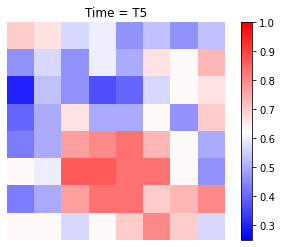

In [25]:
import matplotlib.pyplot as plt

import numpy as np

# Just some example data (random)


rows,cols = accs.shape

plt.imshow(accs, interpolation='nearest', 
                 extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                 cmap='bwr', vmin=0.25, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title('Time = T5')

Text(0.5, 1.0, 'Time = T5')

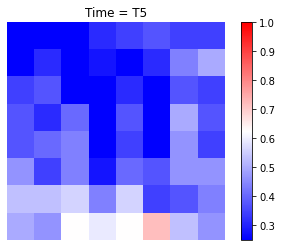

In [27]:
import matplotlib.pyplot as plt

import numpy as np

# Just some example data (random)


rows,cols = accs.shape

plt.imshow(accs, interpolation='nearest', 
                 extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                 cmap='bwr', vmin=0.25, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title('Time = T5')